In [1]:
import derpy 
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
plt.xkcd()

# Added to have access to the lab's functions for NKT laser control
import sys
sys.path.append("C:\\Users\\EPL User\\Desktop\\NKT_laser_control\\")
import FliSdk_V2 as sdk  # As of now only Rayleigh has the First Light SDK installed. The camera is First Light CRED2 ER
from astropy.io import fits
import numpy as np
import time
from pylablib.devices import Thorlabs  # Library for controlling the Thorlabs rotation stages (holding the quarter-wave plates)
import copy
import os
from NKTcontrols.controls import compact, select, driver, get_status

Loading x64 DLL from: C:\Users\Public\Documents\NKT Photonics\SDK\NKTPDLL\x64\NKTPDLL.dll


# Defining new dark saving function

In [2]:
def take_and_save_dark(cam, dir_name, nframes=10):
    # get set temperature
    set_temp = cam.set_temp
    val_fps = cam.fps
    tint = cam.tint

    # take a dark image
    dark = cam.take_many_images(nframes)

    # do the fits file stuff here
    hdu_new = fits.PrimaryHDU(dark)
    hdu_new.writeto(dir_name + str(set_temp) + "C" + "_tint_" + str(tint) + "_FPS_" + str(val_fps) + ".fits", overwrite = "True")

# Initializing Camera Object

In [3]:
set_temperature = -40
fps = 10
tint = 20
temp_tolerance = 0.5

cam = derpy.CRED2(set_temperature=-40, fps=10, tint=90, temp_tolerance=0.5)

Updating...
Sensor Temperature: 7.86C
Motherboard Temperature: 36.75C
Frontend Temperature: 39.0C
Powerboard Temperature: 35.75C
Peltier Temperature: 29.9C
Heatsink Temperature: 30.89C
***********************
Sensor Temperature: 7.86C
Motherboard Temperature: 36.75C
Frontend Temperature: 39.0C
Powerboard Temperature: 35.75C
Peltier Temperature: 29.9C
Heatsink Temperature: 30.89C
***********************
Sensor Temperature: 7.86C
Motherboard Temperature: 36.75C
Frontend Temperature: 39.0C
Powerboard Temperature: 35.75C
Peltier Temperature: 29.9C
Heatsink Temperature: 30.89C
***********************
Sensor Temperature: 10.96C
Motherboard Temperature: 37.75C
Frontend Temperature: 39.5C
Powerboard Temperature: 35.75C
Peltier Temperature: 30.05C
Heatsink Temperature: 30.86C
***********************
Sensor Temperature: 14.42C
Motherboard Temperature: 39.0C
Frontend Temperature: 39.5C
Powerboard Temperature: 36.0C
Peltier Temperature: 30.08C
Heatsink Temperature: 30.86C
***********************
S

KeyboardInterrupt: 

Prior camera tint: 0.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.0100002750.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

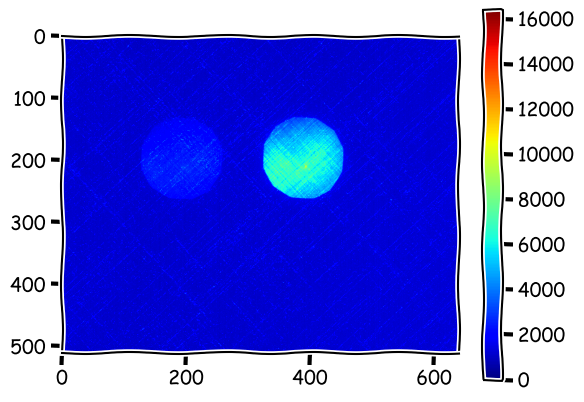

In [108]:
cam.tint = 20
test = cam.take_median_image(10)

plt.imshow(test, cmap="jet", vmax=2**14) # lmao
plt.colorbar()
plt.show()

# Take Dark

In [109]:
cam.tint = 20
cam.fps = 10
dark_dir_name = "C:\\Users\\EPL User\\Desktop\\desktop_drrp_data\\test_12_17_2024\\darks\\"

take_and_save_dark(cam, dark_dir_name, nframes = 10)

Prior camera tint: 0.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.0200023610.

# Reworking Will's code to work with derpy

In [119]:
# File Saving Settings
foldername_base = r"C:\\Users\\EPL User\\Desktop\\desktop_drrp_data\\test_12_17_2024\\calibration\\calibration_raw\\"   # Base folder
filename_string = "DRRP_JHK_"

# Dark File Path
dark_file_path = "C:\\Users\\EPL User\\Desktop\\desktop_drrp_data\\test_12_17_2024\\darks\\-40.0C_tinWt_20.002361_FPS_10.0.fits"

# Camera Settings
cam.tint = 20
cam.fps = 10
cam.set_temp = -40
num_images = 10

# Laser Settings
overall_power = 100
channel_power = 100
wavelengths = [1100] # wavelengths in nm

# QWP Settings
tot_angle = 4
increment = 2

Prior camera tint: 0.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.0999967610.

In [121]:
# data taking script for DRRP, JHK plate
# save data to the desktop for now until exoserver is reconnected
# TODO: put additional information in fits header
# TODO: create folders automatically while saving data. Maybe only save the reduced data?
# TODO: loop script through multiple wavelengths automatically
# TODO: take images at multiple wavelengths before rotating
# TODO: try connecting rotation stages through serial numbers
# TODO: test if multiple stages can be moved simultaneously without interrupting
# TODO: find which laser power (and how focused the beam size should be) that works for all wavelengths

# Script that rotates both quarter-wave plates and takes images for the DRRP method. 
# Make sure the second motor rotates at 5x the rate of the first. I recommend rotating the first motor between 0-180 degrees in 4 degree increments.
# This script reduces the images taken by subtracting a dark frame from each. Make sure the corresponding dark frame exists before taking this data. 
# The images are stored as fits files with comments for the camera conditions in the file header. 
# Comments in all caps indicate parts that should be updated for each data set (wavelength, filename, folderpath)

compact1 = compact()
select1 = select()
driver1 = driver()

# Setup the laser
compact1.reset_interlock()
compact1.emission_on()

compact1.overall_power(overall_power) # set overall power as %
driver1.RF_power_on()
# Check if all other channels are off, then continue

# Now that the camera is set up, prepare for taking data
# Most secure way is to ensure connection with the motor through the Kinesis app before running code

stage1 = Thorlabs.KinesisMotor(Thorlabs.list_kinesis_devices()[0][0],scale='stage')
stage2 = Thorlabs.KinesisMotor(Thorlabs.list_kinesis_devices()[1][0], scale='stage')
print("Connected to K10CR1 devices")

steps = int(tot_angle)/int(increment)

print("Homing devices...")
stage1.move_to(0)
stage1.wait_move()
stage1._setup_homing()
home1 = stage1.home(sync=True)

stage2.move_to(0)
stage2.wait_move()
stage2._setup_homing()
home2 = stage2.home(sync=True)
print('Homing complete')


for i in range(int(steps)+1):
    # Move the quarter waveplates to the next position to take more images
    angle = i * int(increment)
    angle = int(angle)
    # stage1.move_by(int(increment))
    stage1.move_to(angle)
    stage1.wait_move()
    # stage2.move_by(5*int(increment))
    stage2.move_to(5*angle)
    stage2.wait_move()
    position1 = stage1.get_position()
    position2 = stage2.get_position()
    print('Current positions are ' + str(position1) + ' and ' + str(position2) + ' degrees')
    # sdk.Stop(context)


    # for i in range(int(steps)+1):
    for wavelength in wavelengths:
        driver1.set_channel(1, wavelength, channel_power) # set channel 1 to given wavelength at channel power
        frame_list = []
        # Now begin loop for the images
        # foldername = r"C:\\Users\\EPL User\\Desktop\\desktop_drrp_data\\calibration\\calibration_raw\\Cal_1750_Filter\\"
        # foldername = r"Z:\\Lab_Data\\Mueller_Matrix_Polarimeter\\L_Plate_Characterization\\SuperK_Select_Data\\Raw_Data\\L_1600_Raw\\"   # UPDATE FOR EACH FOLDER
        foldername = os.path.join(foldername_base, f"Cal_{wavelength}_Raw\\")

        if not os.path.exists(foldername):
            os.makedirs(foldername) 
        
        for j in range(num_images + 1):
            image16b = cam.take_many_images(num_images)
            time.sleep(1.3 * tint / 1000)
            if j > 0:
                frame_list.append(image16b)
        
        frame_list = np.array(frame_list) 
        hdu_new = fits.PrimaryHDU(frame_list)
        # position1 = stage1.get_position()
        # position2 = stage2.get_position()
        # print('Position 1 is ' + str(position1) + ' and position 2 is ' + str(position2))
        filename = filename_string + str(wavelength) + "nm_FPS_" + str(cam.fps) + "_tint_"  +str(cam.tint) + "_position" + str(position1)          # UPDATE FOR EACH WAVELENGTH
        hdu_new.writeto(foldername + filename + ".fits", overwrite = True)

        # Add comments to the fits file header
        hdu = fits.open(foldername+filename+'.fits', mode='update')
        header = hdu[0].header
        header['COMMENT1'] = "Raw image taken using CRED2 ER performing DRRP measurements."
        header['COMMENT2'] = "QWP1 position: "+str(position1)+" degrees. Camera temperature: "+str(set_temp)+"C. Framerate: "+str(val_fps)+"fps. Exposure time: "+str(set_tint)+"ms. "
        hdu.flush()
        hdu.close()
        print("Files saved to " + str(foldername))


print("Raw images taken")


print("Reducing images...")
for wavelength in wavelengths:
    # UPDATE THESE PARTS FOR EACH WAVELENGTH
    # dark_file = 'Z:\\Lab_Data\\Mueller_Matrix_Polarimeter\\L_Plate_Characterization\\Darks\\Dark_600_0.1.fits'
    dark_file = dark_file_path
    image_file = 'DRRP_'
    # new_directory = r"Z:\\Lab_Data\\Mueller_Matrix_Polarimeter\\L_Plate_Characterization\\SuperK_Select_Data\\Reduced_Data\\Reduced_L_1600\\"
    new_directory_base = r"C:\\Users\\EPL User\\Desktop\\desktop_drrp_data\\calibration\\calibration_reduced\\"   # Base folder
    new_directory = os.path.join(foldername_base, f"Cal_{wavelength}_Reduced\\")

    if not os.path.exists(new_directory):
        os.makedirs(new_directory) 

    # Open the dark image and extract pixel values
    fits.open(dark_file)
    dark = fits.getdata(dark_file)
    dark_median = np.median(dark, axis=0)

    # Search through the desired raw data folder
    for file in os.listdir(foldername):
        if file.startswith(image_file):                                # Call specific files starting with the desired name
            with fits.open(os.path.join(foldername, file)) as hdul:
                img_data = hdul[0].data
                img_median = np.median(img_data, axis=0)
                reduced_data = img_median - dark_median

            # Save the newly reduced image to a reduced data folder
            new_filename = f"Reduced_{file}"
            new_filepath = os.path.join(new_directory, new_filename)
            fits.writeto(new_filepath, reduced_data, overwrite=True)

    # Add comments to the newly reduced imagess
    for file in os.listdir(new_directory):
        if file.startswith('Reduced_'):
            hdu = fits.open(new_directory+file, mode='update')
            header = hdu[0].header
            header['COMMENT1'] = "Reduced image taken using CRED2 ER performing DRRP measurements of the L-band plate."
            header['COMMENT2'] = "Camera temperature: "+str(cam.set_temp)+"C. Framerate: "+str(cam.fps)+"fps. Exposure time: "+str(cam.tint)+"ms."
            hdu.flush()
            hdu.close()

    print("Images have been reduced. Process finished.")


Interlock is OK.
Setting emission ON.
Setting overall power level to 100%.
RF power is ON.
Connected to K10CR1 devices
Homing devices...


KeyboardInterrupt: 